In [1]:
import pandas as pd 
import networkx as nx 
from tqdm import tqdm 
tqdm.pandas()
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm 
from datetime import datetime 
import csv 
from utils_graph import *
from statistics import mean 
from pyvis.network import Network
import functools
import operator



In [2]:
# %%
GC = build_graph_from_csv('../data/conceptnet.en.csv')
GS = build_graph_from_csv('../data/swow.en.csv')

In [3]:

path = '../output/mcscript2.csv_frame_lemma.csv'
output_path = '../output/mcscript2.csv_graph.csv'
df = read_scripts_triples(path)

100%|██████████| 3487/3487 [00:00<00:00, 14751.99it/s]
removing invalid scripts 23 
 remaining 3464 scripts



In [3]:

# df = df.head(1)
# triples = df['triple_lemma']
# print(triples)




In [4]:

def neighborhood(G, nodes, K=1):
    '''
    G: a target graph 
    nodes: a list of node
    returns:
        a list:  K-hop of neighbours for nodes 
    '''
    def neighborhood_single_node(node):
        path_lengths = nx.single_source_dijkstra_path_length(G, node, cutoff=K)
        return [node for node, length in path_lengths.items()]

    neighbors =  map(neighborhood_single_node, nodes) 
    neighbors = list(neighbors)
    neighbors = flat_list(neighbors)
    # for i, x in enumerate(neighbors):
    #     print(i, x)
    return neighbors
def visualize_network(G):
    net = Network(notebook=True, height='1000px', width='700px', directed=False)
    net.from_nx(G)
    net.show_buttons(filter_=['physics'])
    fig_path='../log/example.html'
    net.show(fig_path)

In [5]:
# G = build_graph_from_triples(triples)
def subgraph_info(triples, T, K=1, printed=False):
    '''
    triples: from MCScript, used to construct source graph 
    T : a target graph (i.e., CN/SW)
    K: the hop of neighbours for each node in MCScript graph 

    '''
    if len(triples) == 0:
        return 0
    
    G = build_graph_from_triples(triples)

    G1 = T.subgraph(G.nodes)
    
    G1_neighbours = neighborhood(T, G1.nodes, K)
    new_nodes = set(G1.nodes).union(set(G1_neighbours))
    G1_k_hop = T.subgraph( new_nodes )

    centrality = nx.pagerank_numpy(G1_k_hop, alpha=0.85)
    # G_centrality =[c  for n, c in centrality.items() if n in G1.nodes ]
    G_centrality = [ centrality[n] for n in G1.nodes ]
    mean_centrality = mean(G_centrality)
    
    return mean_centrality

    # print("original graph nodes")
    # print("0-hop graph. Size: {} Order:{}".format(G1.size(), G1.order()))
    # print(G1.nodes)
    # G1_k_hop = T.subgraph(G1_k_hop)
    # print("1-hop graph. Size: {} Order:{}".format(G1_k_hop.size(), G1_k_hop.order()))
    # print(G1_neighbours)
    # print(G1_k_hop.nodes)

    # for i, node in enumerate(G1.nodes):
    #     closeness = nx.closeness_centrality(G1_k_hop, node)
    #     print(i, node, closeness)

    # phi = max(nx.adjacency_spectrum(G1_k_hop))
    # print(f"phi: {phi}")
    # centrality=  nx.katz_centrality_numpy(G1_k_hop, 1/phi*10)

    # print(f"{n} {c:.2f}")
    # mean_centrality = mean(centrality.values())
    # print(mean_centrality)
    # return mean_centrality
    

In [6]:
# ddf['triple_lemma'].progress_apply(lambda x: subgraph_info(eval(x), GS))
df = df.head(10)
df['page_rank_cn'] = df['triple_lemma'].progress_apply(lambda x: subgraph_info(eval(x), GC))
df['page_rank_sw'] = df['triple_lemma'].progress_apply(lambda x: subgraph_info(eval(x), GS))

100%|██████████| 10/10 [10:49<00:00, 64.94s/it]


count    1.000000
mean     0.004193
std           NaN
min      0.004193
25%      0.004193
50%      0.004193
75%      0.004193
max      0.004193
Name: page_rank_cn, dtype: float64
count    1.000000
mean     0.000742
std           NaN
min      0.000742
25%      0.000742
50%      0.000742
75%      0.000742
max      0.000742
Name: page_rank_sw, dtype: float64


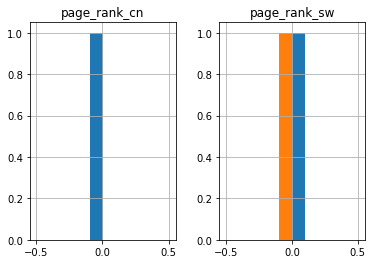

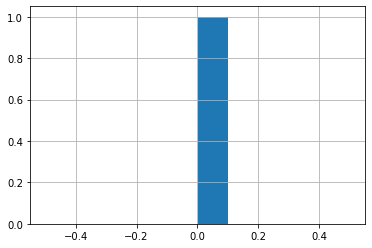

In [7]:
csv_path = '../output/mcscript2.csv_pagerank.csv'
df.to_csv(csv_path)

print(df['page_rank_cn'].describe())
print(df['page_rank_sw'].describe())

df[['page_rank_cn', 'page_rank_sw']].hist()
df['page_rank_cn'].hist()
plt.show()
df['page_rank_sw'].hist()
plt.show()
